In [1]:
import geopandas as gpd
import geoplot as gplt
%matplotlib inline

In [2]:
usa_cities = gpd.read_file(gplt.datasets.get_path("usa_cities"))

In [3]:
usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.2962732 48.23250950000011)
1,101,52838.0,830.0,ND,POINT (-97.03285469999997 47.92525680000006)
2,153,15427.0,1407.0,ND,POINT (-98.70843569999994 46.91054380000003)
3,177,105549.0,902.0,ND,POINT (-96.78980339999998 46.87718630000012)
4,192,17787.0,2411.0,ND,POINT (-102.7896241999999 46.87917560000005)


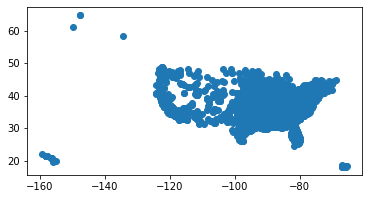

In [4]:
usa_cities.plot()

Just continental

In [5]:
continental_usa_cities = usa_cities.query("STATE not in ['HI', 'AK', 'PR']")

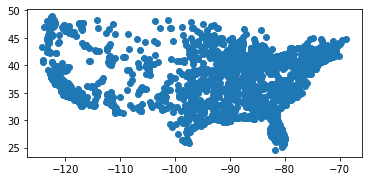

In [6]:
continental_usa_cities.plot()

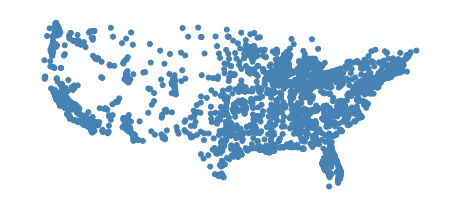

In [7]:
gplt.pointplot(continental_usa_cities)

Contiguous - if you're working with polygons

In [8]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

In [9]:
contiguous_usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59940899999999 48.010274, -89.48..."
1,Montana,USA-3515,989415,"POLYGON ((-111.194189 44.561156, -111.291548 4..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.601359 46.351357, -96.5389080000..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.049728 44.488163, -111.050245 4..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.998073 46.33017, -116.906528 46..."


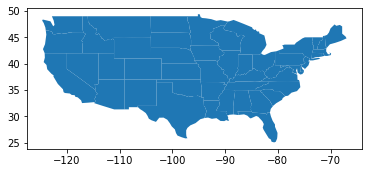

In [10]:
contiguous_usa.plot()

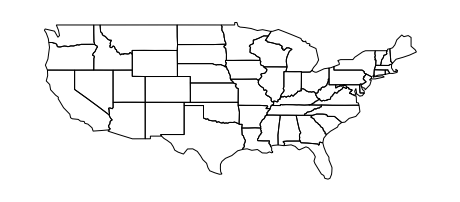

In [11]:
gplt.polyplot(contiguous_usa)

You can also, just like with anything in matplotlib, stack plots on top of another.

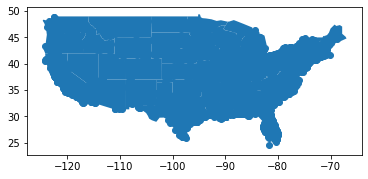

In [12]:
ax = contiguous_usa.plot()
continental_usa_cities.plot(ax = ax)

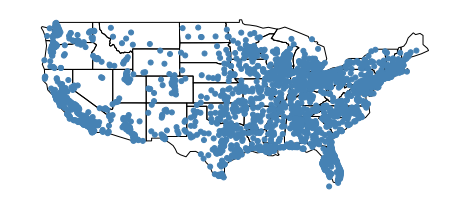

In [13]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax = ax)

Projections

In [14]:
import geoplot.crs as gcrs

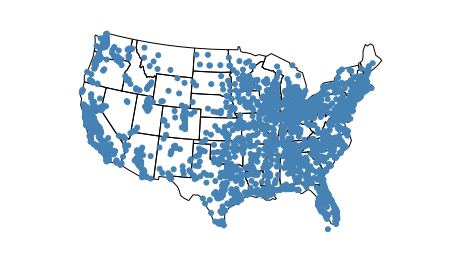

In [15]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, ax = ax)

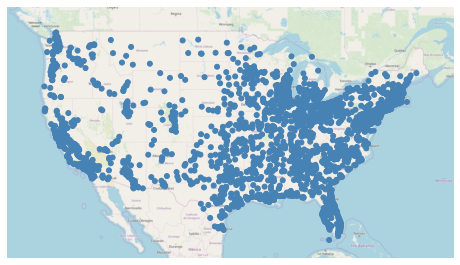

In [16]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax)

Encoding other parameters

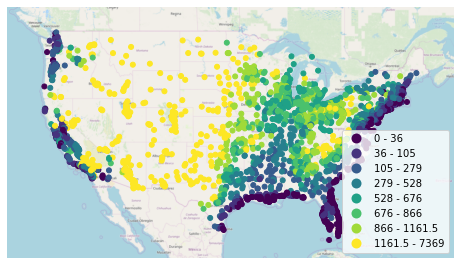

In [17]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax, hue='ELEV_IN_FT', k=8, legend=True)

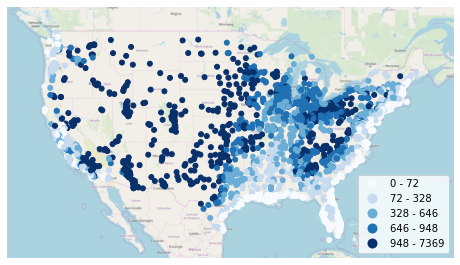

In [18]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax, hue='ELEV_IN_FT', k=5, cmap='Blues', legend=True)

Adding `scale`

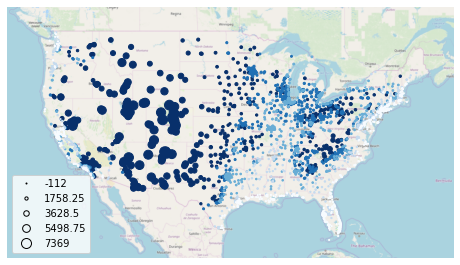

In [19]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(
    continental_usa_cities, ax=ax, hue='ELEV_IN_FT', k=5, cmap='Blues',
    scale='ELEV_IN_FT', limits=(1, 10),
    legend=True, legend_var='scale'
)

Because it's matplotlib underneath you can adjust the look and feel of the plot a lot.

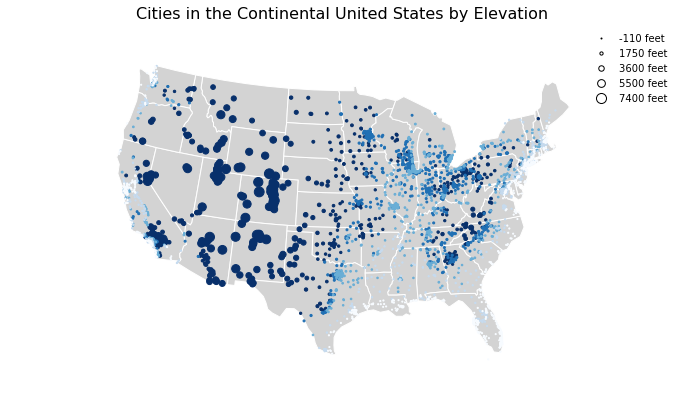

In [20]:
ax = gplt.polyplot(
    contiguous_usa, projection=gcrs.AlbersEqualArea(),
    edgecolor='white', facecolor='lightgray',
    figsize=(12, 8)
)
gplt.pointplot(
    continental_usa_cities, ax=ax, hue='ELEV_IN_FT', cmap='Blues', k=5,
    scale='ELEV_IN_FT', limits=(1, 10),
    legend=True, legend_var='scale',
    legend_kwargs={'frameon': False},
    legend_values=[-110, 1750, 3600, 5500, 7400],
    legend_labels=['-110 feet', '1750 feet', '3600 feet', '5500 feet', '7400 feet']
)
ax.set_title('Cities in the Continental United States by Elevation', fontsize=16);

You can also make choropleths and heatmaps easily with geoplot

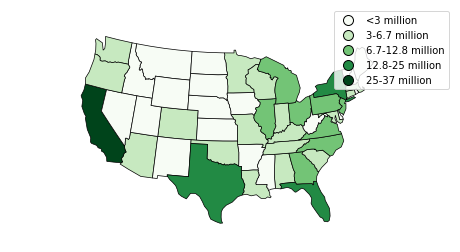

In [21]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    edgecolor='black', linewidth=.7,
    cmap='Greens', k=5, legend=True,
    scheme='fisher_jenks',
    legend_labels=[
        '<3 million', '3-6.7 million', '6.7-12.8 million',
        '12.8-25 million', '25-37 million'
    ]
)

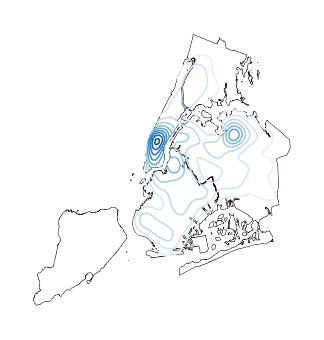

In [22]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

ax = gplt.kdeplot(collisions, cmap='Blues', shade=False, clip=boroughs, projection=gcrs.AlbersEqualArea())
gplt.polyplot(boroughs, zorder=1, ax=ax)

In [23]:
collisions.head()

,id,ON STREET NAME,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 3,NUMBER OF CYCLIST INJURED,LONGITUDE,OFF STREET NAME,VEHICLE TYPE CODE 4,LATITUDE,LOCATION,...,ZIP CODE,VEHICLE TYPE CODE 3,NUMBER OF CYCLIST KILLED,DATE,UNIQUE KEY,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 5,TIME,NUMBER OF PEDESTRIANS INJURED,geometry
0,18,WORTMAN AVENUE,0,None,0,-73.872007,None,None,40.662514,"(40.6625139, -73.8720068)",...,11208.0,None,0,11/10/2016,3559576,None,None,16:11:00,0,POINT (-73.87200679999999 40.66251389999999)
1,21,HUBERT STREET,0,None,0,-74.008344,None,None,40.721323,"(40.7213228, -74.0083444)",...,10013.0,None,0,11/10/2016,3557391,None,None,05:11:00,1,POINT (-74.0083444 40.7213228)
2,69,HENRY STREET,0,None,0,-73.997563,None,None,40.687999,"(40.6879989, -73.9975625)",...,11201.0,None,0,04/16/2016,3419378,None,None,09:15:00,0,POINT (-73.9975625 40.6879989)
3,80,None,0,Failure to Yield Right-of-Way,0,-73.854542,67-64 FLEET STREET,None,40.719228,"(40.7192276, -73.8545422)",...,11375.0,PASSENGER VEHICLE,0,04/15/2016,3428072,None,None,10:20:00,0,POINT (-73.8545422 40.7192276)
4,85,BEDFORD AVENUE,0,None,0,-73.952731,None,None,40.632147,"(40.6321467, -73.9527315)",...,11210.0,None,0,04/15/2016,3417537,None,None,10:35:00,0,POINT (-73.9527315 40.6321467)


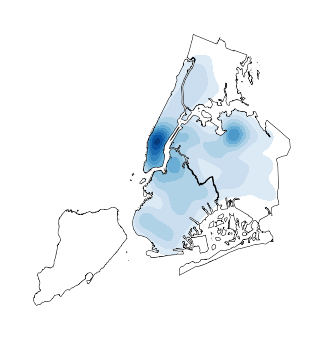

In [25]:
ax = gplt.kdeplot(collisions, cmap='Blues', shade=True, clip=boroughs, projection=gcrs.AlbersEqualArea())
gplt.polyplot(boroughs, zorder=1, ax=ax)

And many more

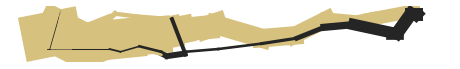

In [26]:
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import mplleaflet
from matplotlib.colors import LinearSegmentedColormap

napoleon_troop_movements = gpd.read_file(gplt.datasets.get_path('napoleon_troop_movements'))

colors = [(215/255, 193/255, 126/255), (37/255, 37/255, 37/255)]
cm = LinearSegmentedColormap.from_list('minard', colors)

gplt.sankey(
    napoleon_troop_movements,
    scale='survivors', limits=(0.5, 45),
    hue='direction',
    cmap=cm
)
fig = plt.gcf()
plt.savefig("minard-napoelon-russia.png", bbox_inches='tight', pad_inches=0.1)

In [27]:
mplleaflet.display(fig)

C:\Users\sanchez\AppData\Local\Continuum\anaconda3\envs\NACIS2019\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
